# Our final aim is to be able to make prediction on the quality of wine using logistic regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None


In [3]:
data=pd.read_csv('C:\\Users\\Admin\\Downloads\\archive (3)\\winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
data.shape

(6497, 13)

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<AxesSubplot:>

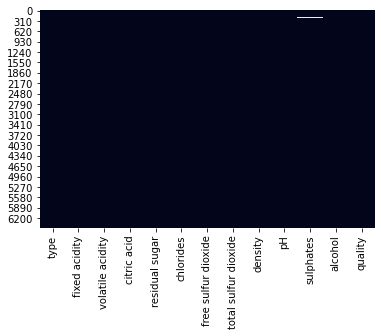

In [8]:
sns.heatmap(data.isna(),cbar=False)

In [9]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
data.fillna(data.select_dtypes(include='float64').mean().iloc[0],inplace=True)

<AxesSubplot:>

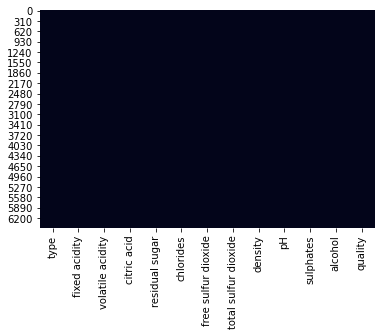

In [11]:
sns.heatmap(data.isna(),cbar=False)

In [12]:
data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
corr=data.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.117181,0.219011,-0.112254,0.096864,-0.283237,-0.329409,0.458941,-0.189062,0.189602,-0.095560,-0.076967
volatile acidity,0.117181,1.000000,-0.139544,-0.117845,0.054961,-0.200447,-0.220118,0.148676,0.095082,0.096633,-0.031674,-0.143789
citric acid,0.219011,-0.139544,1.000000,0.106022,0.016348,0.101294,0.142904,0.075104,-0.163225,0.018438,-0.014060,0.057315
residual sugar,-0.112254,-0.117845,0.106022,1.000000,-0.021819,0.403412,0.495795,0.552435,-0.198216,-0.128829,-0.359748,-0.036729
chlorides,0.096864,0.054961,0.016348,-0.021819,1.000000,-0.052873,-0.070825,0.094592,-0.011441,0.055281,-0.064622,-0.069783
free sulfur dioxide,-0.283237,-0.200447,0.101294,0.403412,-0.052873,1.000000,0.720934,0.025717,-0.107553,-0.125877,-0.179838,0.055463
total sulfur dioxide,-0.329409,-0.220118,0.142904,0.495795,-0.070825,0.720934,1.000000,0.032395,-0.178161,-0.190852,-0.265740,-0.041385
density,0.458941,0.148676,0.075104,0.552435,0.094592,0.025717,0.032395,1.000000,0.006548,0.176706,-0.686745,-0.305858
pH,-0.189062,0.095082,-0.163225,-0.198216,-0.011441,-0.107553,-0.178161,0.006548,1.000000,0.111679,0.085384,0.016247
sulphates,0.189602,0.096633,0.018438,-0.128829,0.055281,-0.125877,-0.190852,0.176706,0.111679,1.000000,-0.002050,0.013824


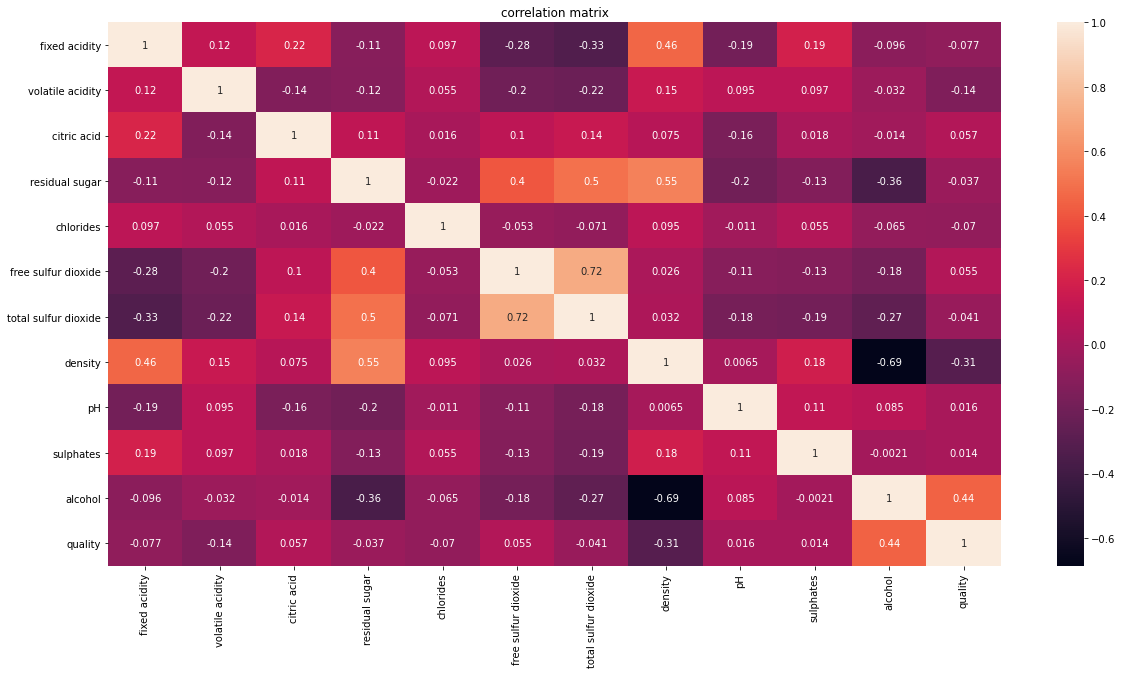

In [14]:
plt.figure(figsize=(20,10))
g=sns.heatmap(corr,annot=True)
g.set(title='correlation matrix')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='quality'>

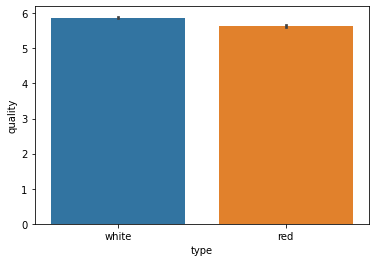

In [15]:
sns.barplot(data['type'],data['quality'])

Here, we can see that there is no significant difference between the ratings of white and red wine.

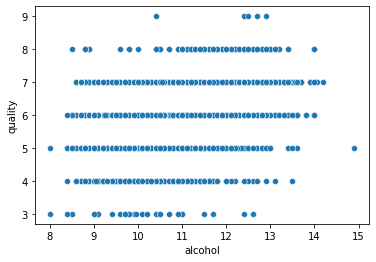

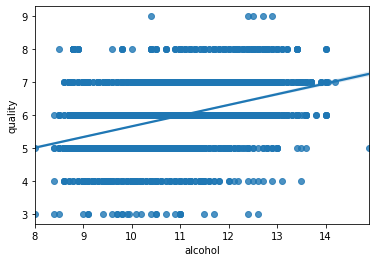

In [16]:
sns.scatterplot(x=data['alcohol'],y=data['quality'])
plt.show()
sns.regplot(x=data['alcohol'],y=data['quality'])
plt.show()


In [17]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.348159,0.321907,5.444872,0.058246,30.525319,115.744574,0.994697,3.223934,0.535331,10.491801,5.818378
std,1.295751,0.291968,0.207499,4.757494,0.130416,17.749400,56.521855,0.002999,0.218908,0.222792,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,7.216579,7.216579,65.800000,7.216579,289.000000,440.000000,1.038980,7.216579,7.216579,14.900000,9.000000


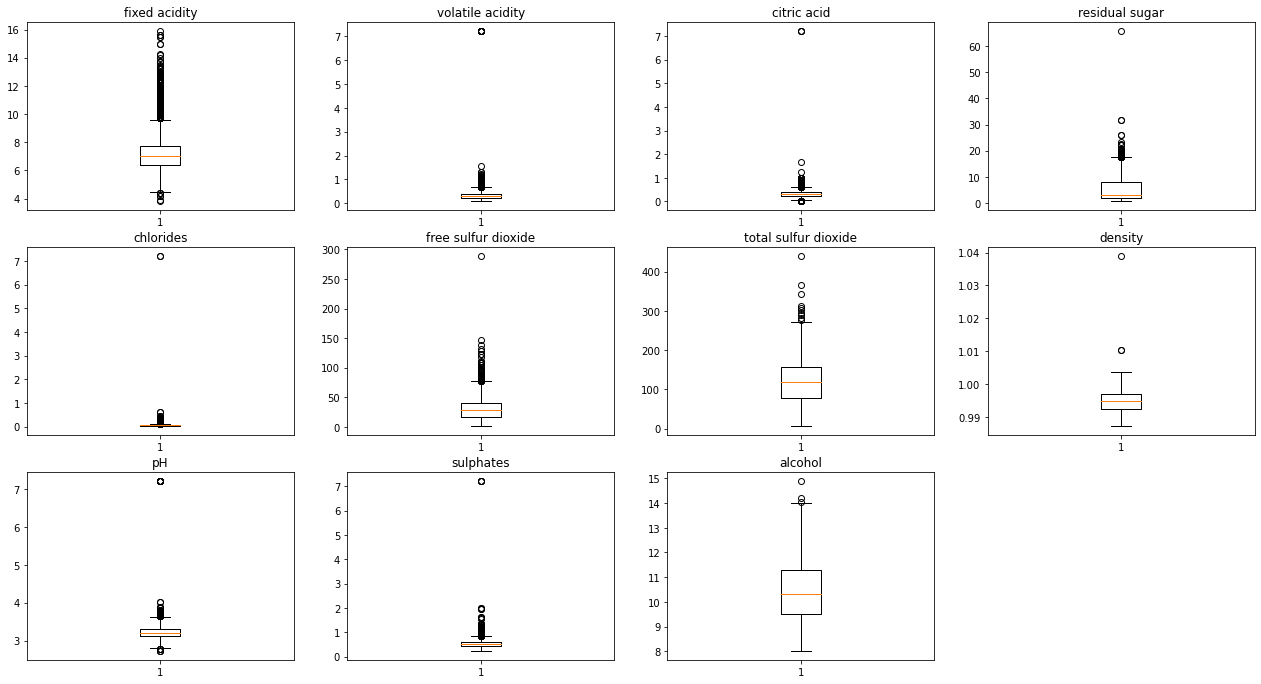

In [18]:
outliers=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
plt.figure(figsize=(22,20))
for i in range(0,11):
    plt.subplot(5,4,i+1)
    plt.boxplot(data[outliers[i]])
    plt.title(outliers[i])

In [19]:
print(data['fixed acidity'].quantile(0.10))
print(data['fixed acidity'].quantile(0.90))


6.0
8.8


In [20]:
data['fixed acidity']=np.where(data['fixed acidity']<6,6,data['fixed acidity'])
data['fixed acidity']=np.where(data['fixed acidity']>8.8,8.8,data['fixed acidity'])



In [21]:
print(data['volatile acidity'].quantile(0.10))
print(data['volatile acidity'].quantile(0.90))


0.18
0.59


In [22]:
data['volatile acidity']=np.where(data['volatile acidity']<0.18,0.18,data['volatile acidity'])
data['volatile acidity']=np.where(data['volatile acidity']>0.59,0.59,data['volatile acidity'])



In [23]:
print(data['citric acid'].quantile(0.10))
print(data['citric acid'].quantile(0.90))


0.14
0.49


In [24]:
data['citric acid']=np.where(data['citric acid']<0.14,0.14,data['citric acid'])
data['citric acid']=np.where(data['citric acid']>0.49,0.49,data['citric acid'])



In [25]:
print(data['residual sugar'].quantile(0.10))
print(data['residual sugar'].quantile(0.90))


1.3
13.0


In [26]:
data['residual sugar']=np.where(data['residual sugar']<1.3,1.3,data['residual sugar'])
data['residual sugar']=np.where(data['residual sugar']>13,13,data['residual sugar'])



In [27]:
print(data['chlorides'].quantile(0.10))
print(data['chlorides'].quantile(0.90))


0.031
0.086


In [28]:
data['chlorides']=np.where(data['chlorides']<0.031,0.031,data['chlorides'])
data['chlorides']=np.where(data['chlorides']>0.086,0.086,data['chlorides'])



In [29]:
print(data['free sulfur dioxide'].quantile(0.10))
print(data['free sulfur dioxide'].quantile(0.90))


9.0
54.0


In [30]:
data['free sulfur dioxide']=np.where(data['free sulfur dioxide']<9,9,data['free sulfur dioxide'])
data['free sulfur dioxide']=np.where(data['free sulfur dioxide']>54,54,data['free sulfur dioxide'])


In [31]:
print(data['total sulfur dioxide'].quantile(0.10))
print(data['total sulfur dioxide'].quantile(0.90))


30.0
188.0


In [32]:
data['total sulfur dioxide']=np.where(data['total sulfur dioxide']<30,30,data['total sulfur dioxide'])
data['total sulfur dioxide']=np.where(data['total sulfur dioxide']>188,188,data['total sulfur dioxide'])


In [33]:
print(data['density'].quantile(0.10))
print(data['density'].quantile(0.90))


0.9906699999999999
0.9984


In [34]:
data['density']=np.where(data['density']<0.9906699999999999,0.9906699999999999,data['density'])
data['density']=np.where(data['density']>0.9984,0.9984,data['density'])


In [35]:
print(data['pH'].quantile(0.10))
print(data['pH'].quantile(0.90))


3.02
3.42


In [36]:
data['pH']=np.where(data['pH']<3.02,3.02,data['pH'])
data['pH']=np.where(data['pH']>3.42,3.42,data['pH'])


In [37]:
print(data['sulphates'].quantile(0.10))
print(data['sulphates'].quantile(0.90))


0.37
0.72


In [38]:
data['sulphates']=np.where(data['sulphates']<0.37,0.37,data['sulphates'])
data['sulphates']=np.where(data['sulphates']>0.72,0.72,data['sulphates'])


In [39]:
print(data['alcohol'].quantile(0.10))
print(data['alcohol'].quantile(0.90))


9.1
12.3


In [40]:
data['alcohol']=np.where(data['alcohol']<9.1,9.1,data['alcohol'])
data['alcohol']=np.where(data['alcohol']>12.3,12.3,data['alcohol'])


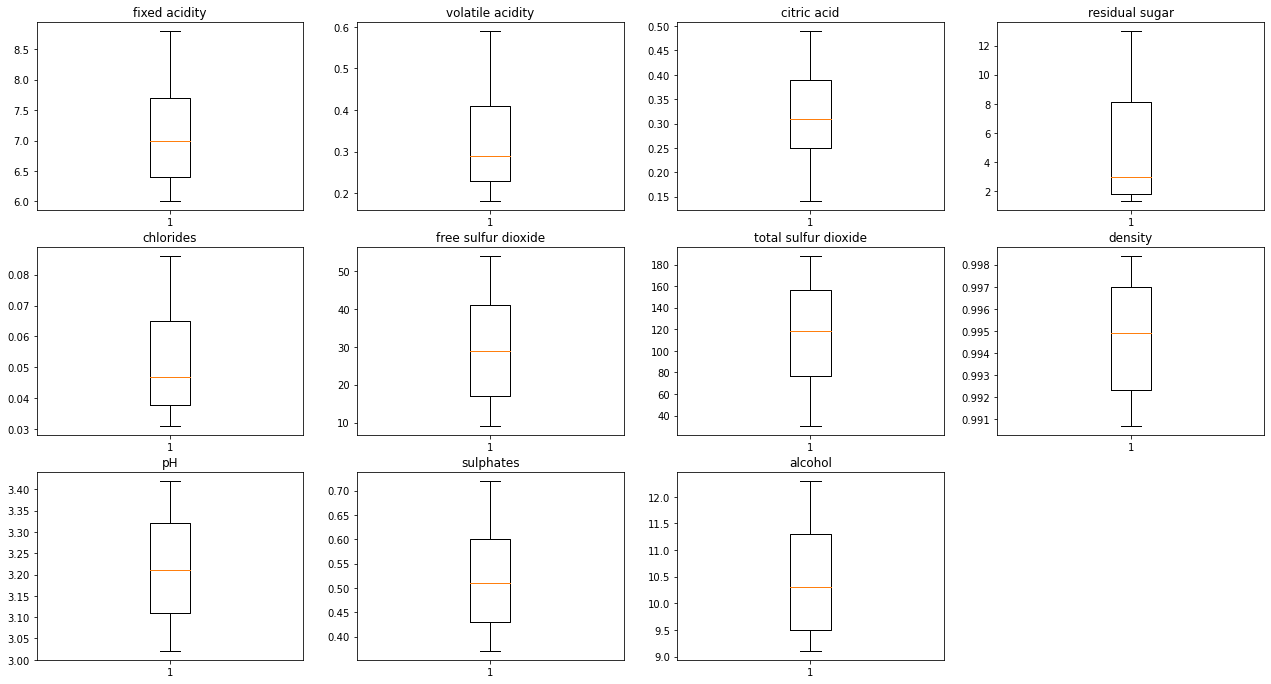

In [41]:
outliers=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
plt.figure(figsize=(22,20))
for i in range(0,11):
    plt.subplot(5,4,i+1)
    plt.boxplot(data[outliers[i]])
    plt.title(outliers[i])

In [42]:
data['type'] = data['type'].map({'white':0, 'red':1})


In [43]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,13.0,0.045,45.0,170.0,0.9984,3.02,0.45,9.1,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [44]:
## spliting into independent variable and target variable
x = data.iloc[:, data.columns != 'quality']

# consider the target variable
y = data.iloc[:, data.columns == 'quality']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4547, 12)
(1950, 12)
(4547, 1)
(1950, 1)


In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr = LogisticRegression(random_state=40)
lr.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=40)

In [49]:
y_pred=lr.predict(x_test)
y_pred

array([5, 5, 6, ..., 6, 6, 5], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [51]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.4846153846153846
[[  0   0   4  10   0   0]
 [  0   0  33  33   0   0]
 [  0   0 308 286   0   0]
 [  0   0 239 637   0   0]
 [  0   0  58 282   0   0]
 [  0   0   4  56   0   0]]


In [52]:
from sklearn import metrics
confusion=metrics.confusion_matrix(y_test,y_pred)
print(confusion)

[[  0   0   4  10   0   0]
 [  0   0  33  33   0   0]
 [  0   0 308 286   0   0]
 [  0   0 239 637   0   0]
 [  0   0  58 282   0   0]
 [  0   0   4  56   0   0]]


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        66
           5       0.48      0.52      0.50       594
           6       0.49      0.73      0.58       876
           7       0.00      0.00      0.00       340
           8       0.00      0.00      0.00        60

    accuracy                           0.48      1950
   macro avg       0.16      0.21      0.18      1950
weighted avg       0.36      0.48      0.41      1950



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
train_accuracy = lr.score(x_train, y_train)
test_accuracy = lr.score(x_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy Score of Train Model : {:.2f}'.format(train_accuracy), 
      'Accuracy Score of Test  Model : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy Score of Train Model : 0.48
Accuracy Score of Test  Model : 0.48


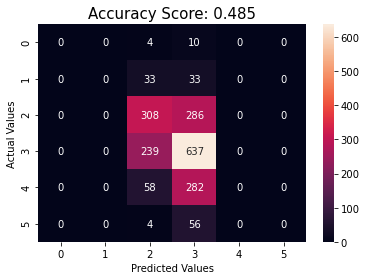

In [55]:
from sklearn.metrics import confusion_matrix as cm

predictions = lr.predict(x_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [56]:
from sklearn.linear_model import LogisticRegression
f=LogisticRegression(max_iter=10000)
f.fit(x_train,y_train)
g=f.predict(x_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.541025641025641